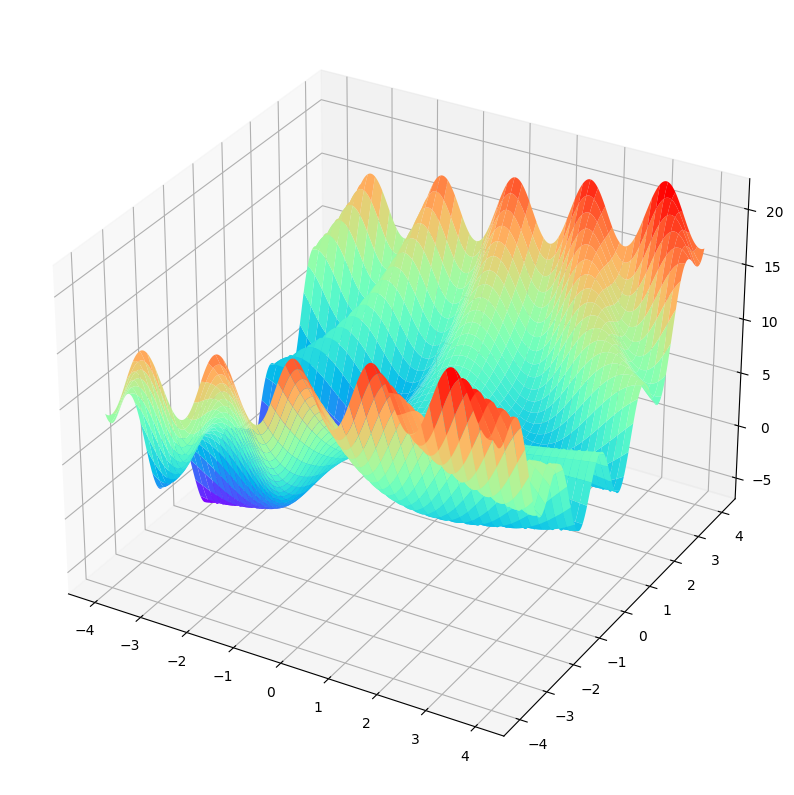

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.arange(-4 ,4 ,0.01)
Y = np.arange(-4 ,4 ,0.01)
x, y = np.meshgrid(X ,Y)
Z = 3*np.cos(x * y) + x + y**2

# 作图
fig = plt.figure(figsize=(10,15))
ax3 = plt.axes(projection = "3d")
ax3.plot_surface(x,y,Z ,cmap = "rainbow")
# ax3.contour(x ,y ,Z ,zdim = "z" ,offset=-2 ,cmap = "rainbow")
plt.show()

最优值为 -6.4063965702604575 最优位置为 [-3.99999512 -0.74624737]


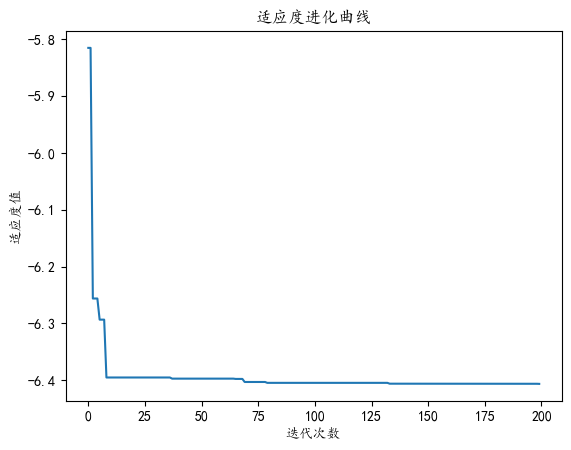

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# 设置字体和设置负号
matplotlib.rc("font", family="KaiTi")
matplotlib.rcParams["axes.unicode_minus"] = False
# 初始化种群，群体规模，每个粒子的速度和规模
N = 100 # 种群数目
D = 2 # 维度
T = 200 # 最大迭代次数
c1 = c2 = 1.5 # 个体学习因子与群体学习因子
w_max = 0.8 # 权重系数最大值
w_min = 0.4 # 权重系数最小值
x_max = 4 # 每个维度最大取值范围，如果每个维度不一样，那么可以写一个数组，下面代码依次需要改变
x_min = -4 # 同上
v_max = 1 # 每个维度粒子的最大速度
v_min = -1 # 每个维度粒子的最小速度


# 定义适应度函数
def func(x):
    return 3 * np.cos(x[0] * x[1]) + x[0] + x[1] ** 2


# 初始化种群个体
x = np.random.rand(N, D) * (x_max - x_min) + x_min # 初始化每个粒子的位置
v = np.random.rand(N, D) * (v_max - v_min) + v_min # 初始化每个粒子的速度

# 初始化个体最优位置和最优值
p = x # 用来存储每一个粒子的历史最优位置
p_best = np.ones((N, 1))  # 每行存储的是最优值
for i in range(N): # 初始化每个粒子的最优值，此时就是把位置带进去，把适应度值计算出来
    p_best[i] = func(x[i, :])

# 初始化全局最优位置和全局最优值
g_best = 100 #设置真的全局最优值
gb = np.ones(T) # 用于记录每一次迭代的全局最优值
x_best = np.ones(D) # 用于存储最优粒子的取值

# 按照公式依次迭代直到满足精度或者迭代次数
for i in range(T):
    for j in range(N):
        # 个更新个体最优值和全局最优值
        if p_best[j] > func(x[j,:]):
            p_best[j] = func(x[j,:])
            p[j,:] = x[j,:].copy()
        # p_best[j] = func(x[j,:]) if func(x[j,:]) < p_best[j] else p_best[j]
        # 更新全局最优值
        if g_best > p_best[j]:
            g_best = p_best[j]
            x_best = x[j,:].copy()   # 一定要加copy，否则后面x[j,:]更新也会将x_best更新
        # 计算动态惯性权重
        w = w_max - (w_max - w_min) * i / T
        # 更新位置和速度
        v[j, :] = w * v[j, :] + c1 * np.random.rand(1) * (p[j, :] - x[j, :]) + c2 * np.random.rand(1) * (x_best - x[j, :])
        x[j, :] = x[j, :] + v[j, :]
        # 边界条件处理
        for ii in range(D):
            if (v[j, ii] > v_max) or (v[j, ii] < v_min):
                v[j, ii] = v_min + np.random.rand(1) * (v_max - v_min)
            if (x[j, ii] > x_max) or (x[j, ii] < x_min):
                x[j, ii] = x_min + np.random.rand(1) * (x_max - x_min)
    # 记录历代全局最优值
    gb[i] = g_best
print("最优值为", gb[T - 1],"最优位置为",x_best)
plt.plot(range(T),gb)
plt.xlabel("迭代次数")
plt.ylabel("适应度值")
plt.title("适应度进化曲线")
plt.show()

best_x is  [0.   0.05 0.5 ] best_y is [0.25]


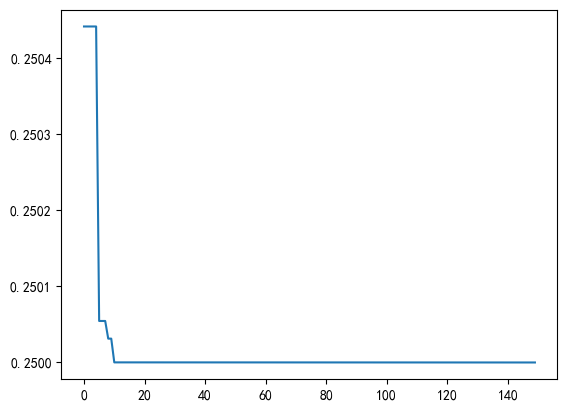

In [3]:
def demo_func(x):
    x1, x2, x3 = x
    return x1 ** 2 + (x2 - 0.05) ** 2 + x3 ** 2

from sko.PSO import PSO

pso = PSO(func=demo_func, dim=3, pop=40, max_iter=150, lb=[0, -1, 0.5], ub=[1, 1, 1], w=0.8, c1=0.5, c2=0.5)
pso.run()
print('best_x is ', pso.gbest_x, 'best_y is', pso.gbest_y)

import matplotlib.pyplot as plt

plt.plot(pso.gbest_y_hist)
plt.show()

In [4]:
num_points = 31                #num_points指需要遍历的节点个数
points_coordinate = np.random.rand(num_points, 2)    #points_coordinate是自定义问题中的节点坐标信息

In [5]:
from sko.PSO import PSO_TSP
from scipy import spatial
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')
def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

pso_tsp = PSO_TSP(func=cal_total_distance, n_dim=num_points, size_pop=200, max_iter=800, w=0.8, c1=0.1, c2=0.1)

best_points, best_distance = pso_tsp.run()
print('best_distance', best_distance)

best_distance [4.54853035]


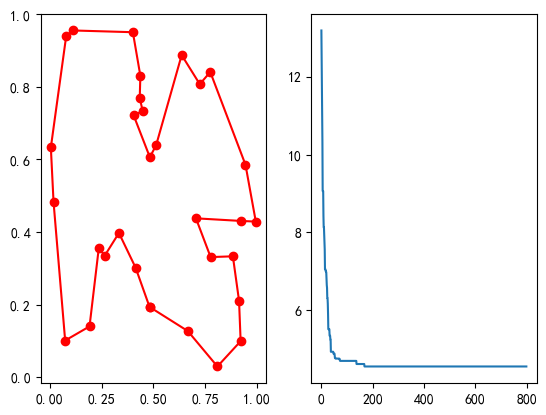

In [6]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(pso_tsp.gbest_y_hist)
plt.show()
